In [51]:
#Lets import necessory libraries
# import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the Boston dataset
boston = load_boston()

In [3]:
# create a Pandas dataframe from the dataset
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
# add the target variable to the dataframe
df['Price'] = boston.target

In [6]:
#Lets look the dataset for once
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# EDA -> Exploratory Data Analysis


In [49]:
#Select all numerical columns for ploting Distplot and Box plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


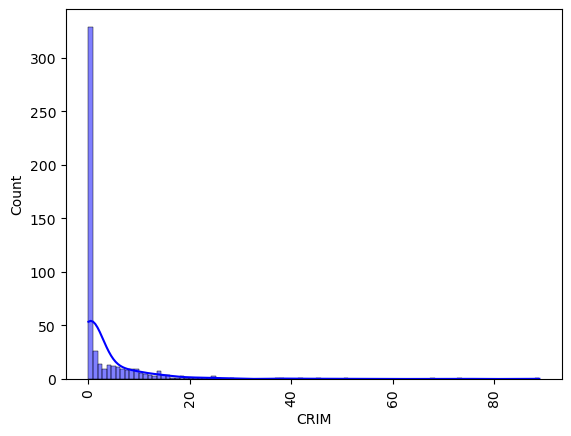

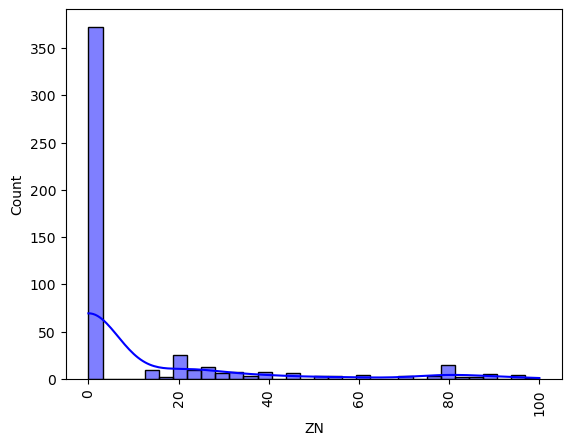

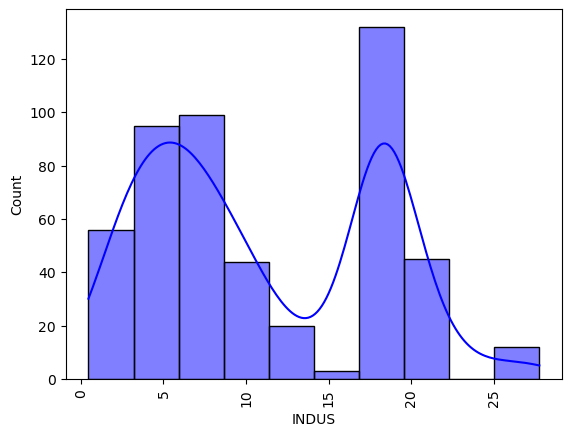

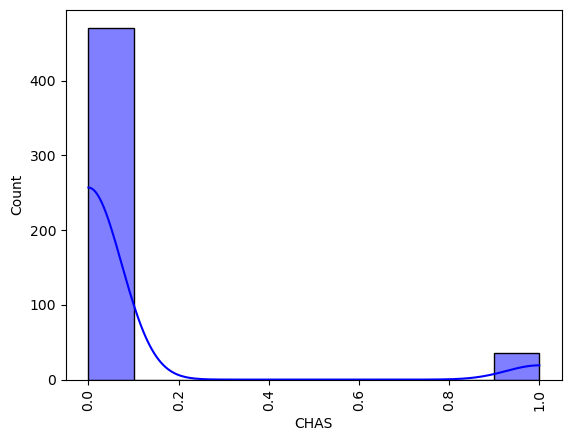

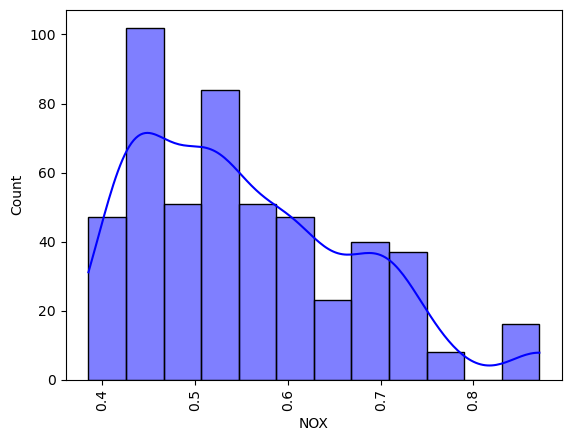

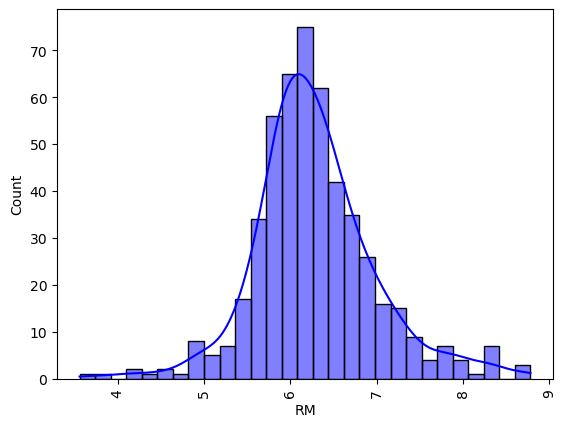

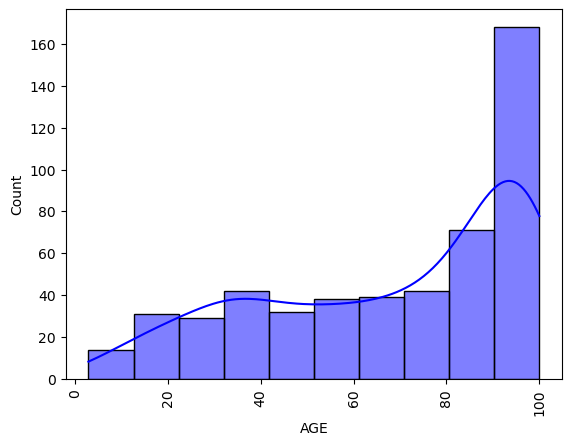

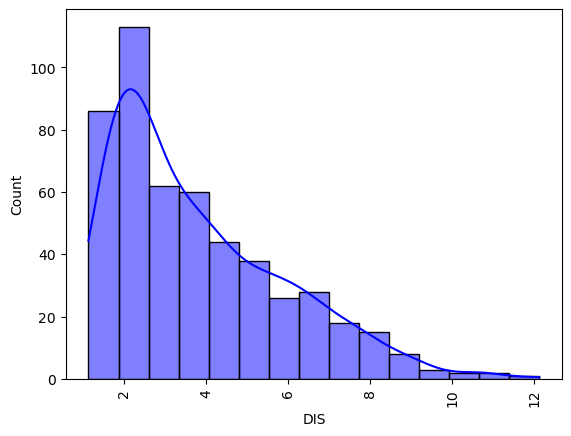

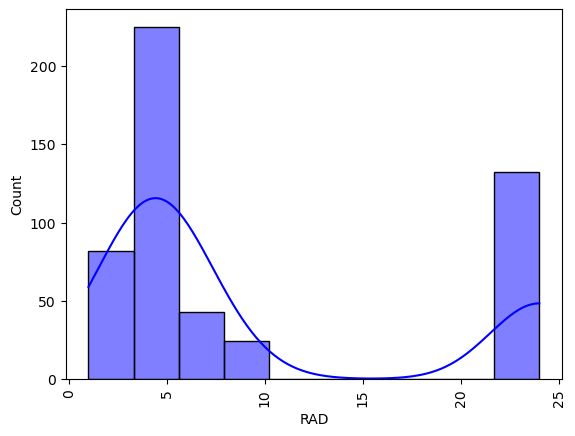

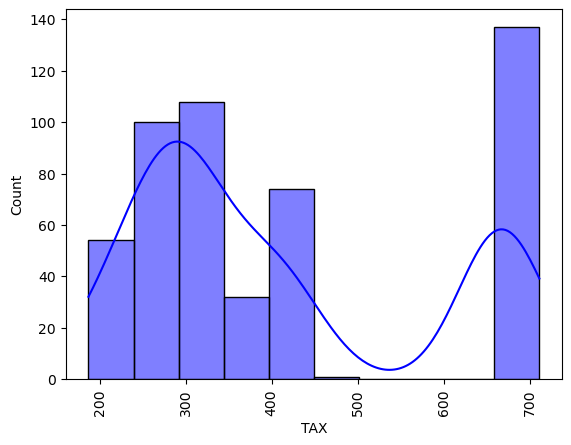

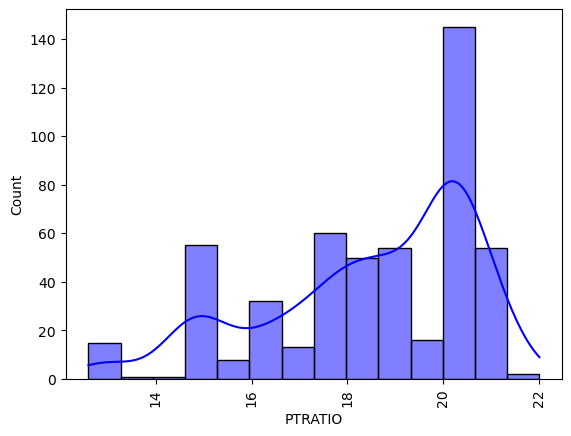

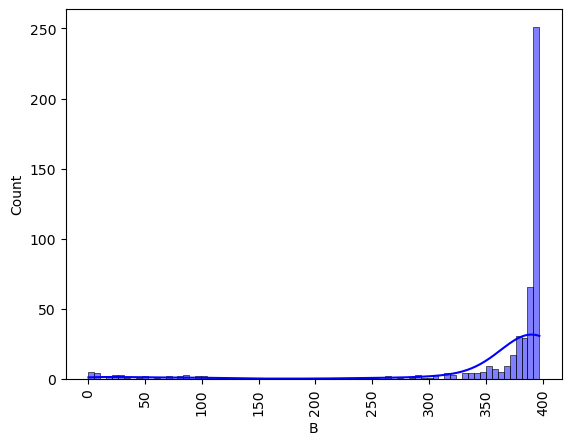

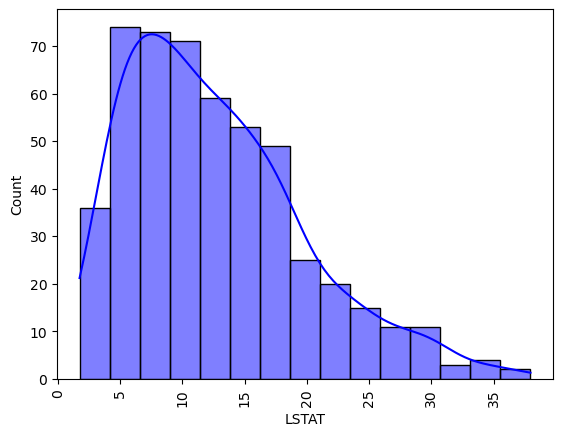

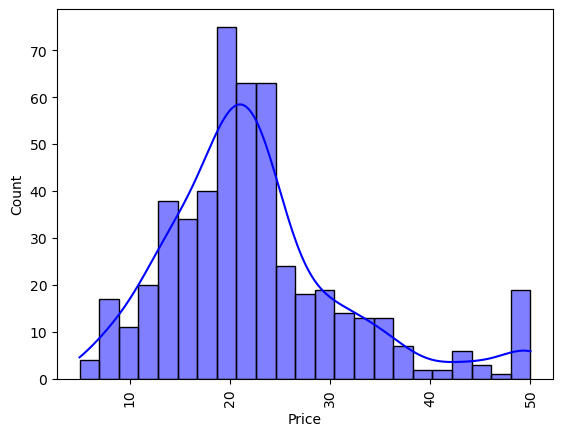

In [56]:
#Lets plot hist plot 
#
for i in newdf:
    plt.figure()
    sns.histplot(newdf[i],color='blue',kde=True)
    plt.xticks(rotation=90)
    plt.show()

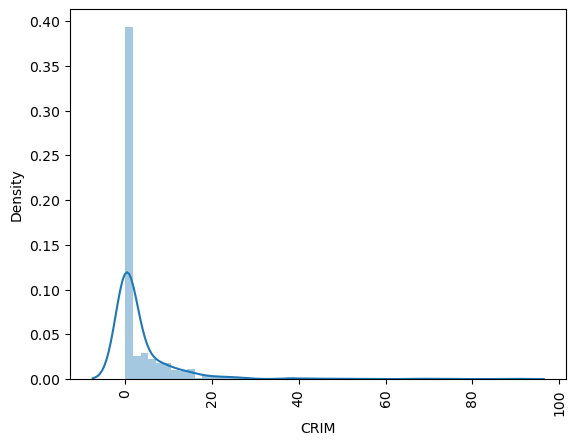

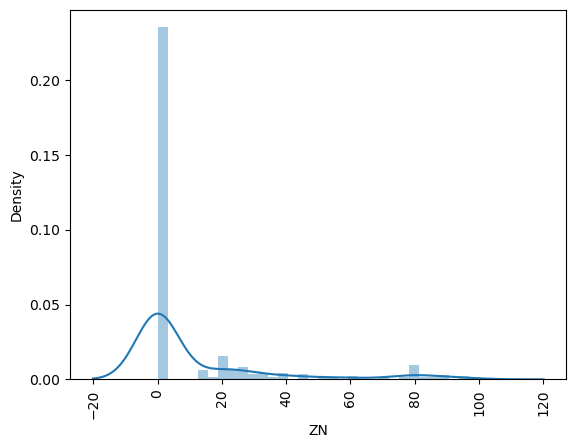

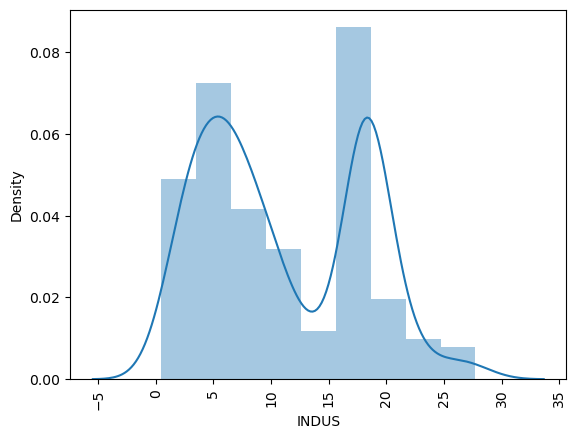

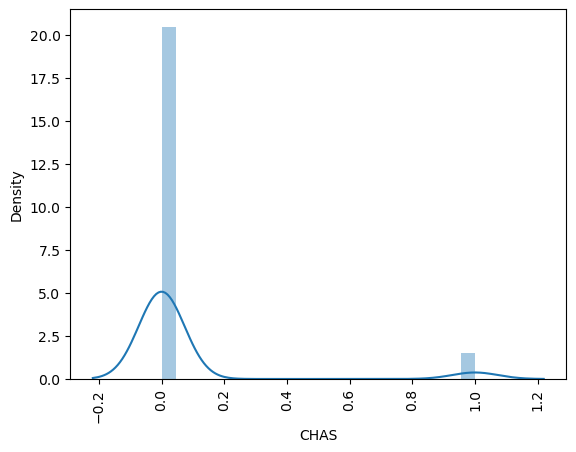

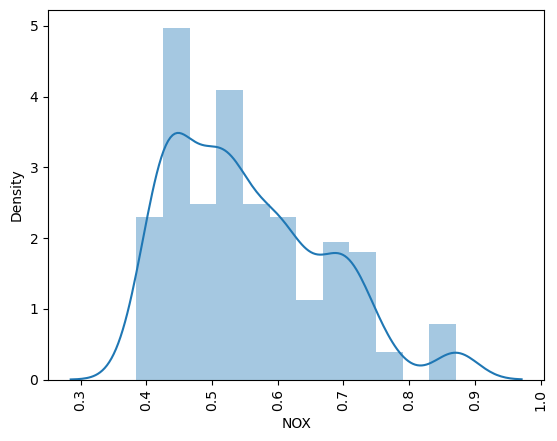

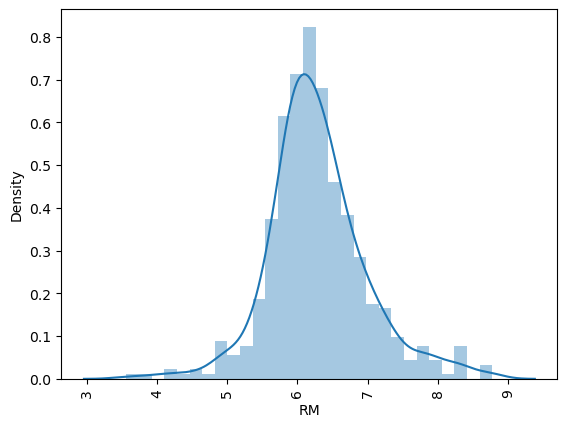

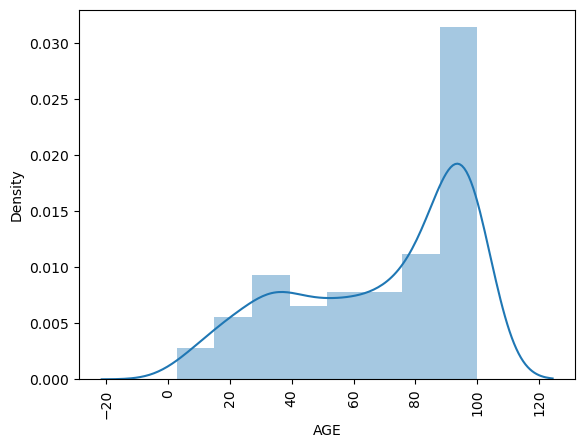

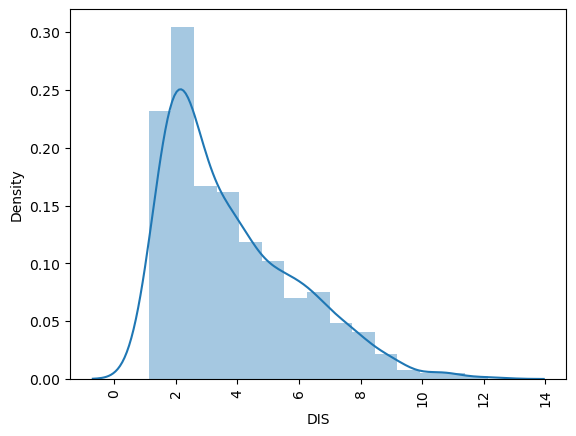

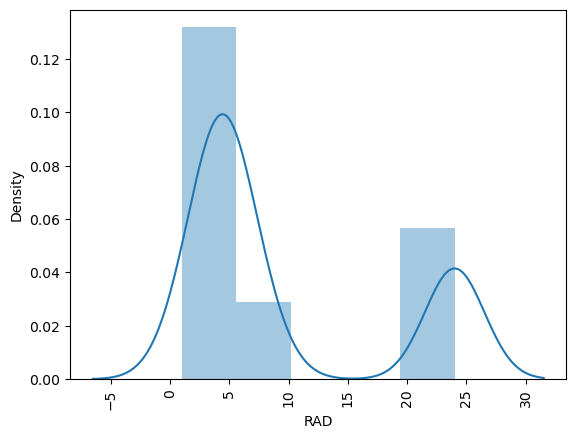

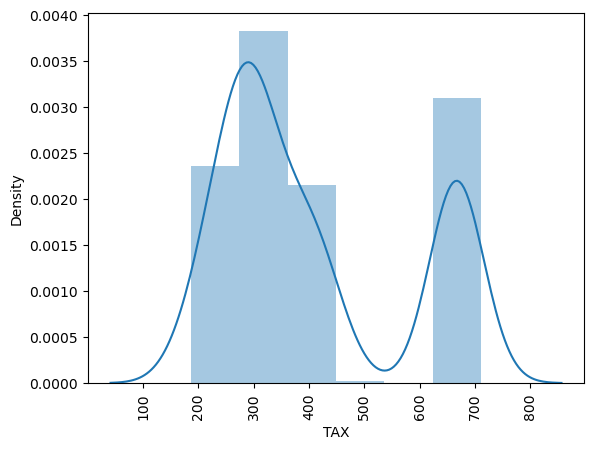

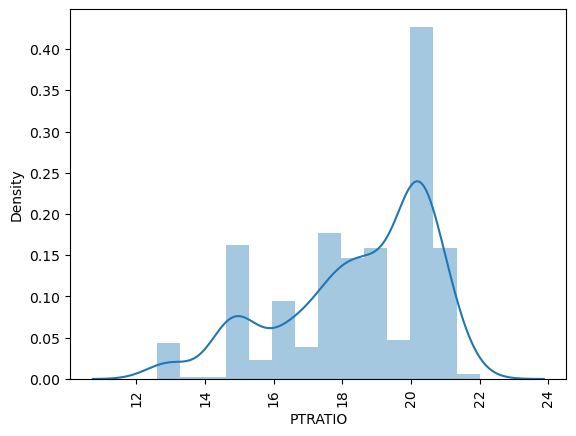

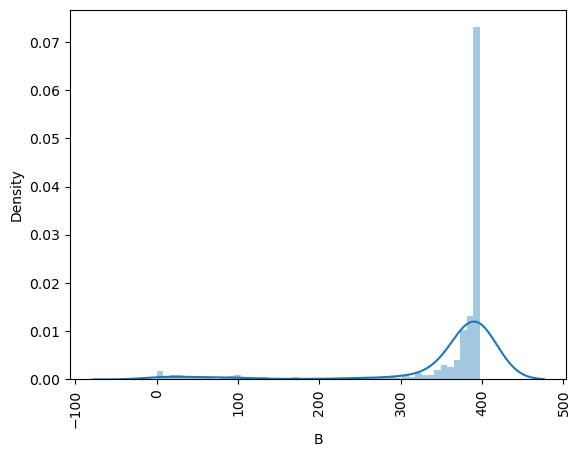

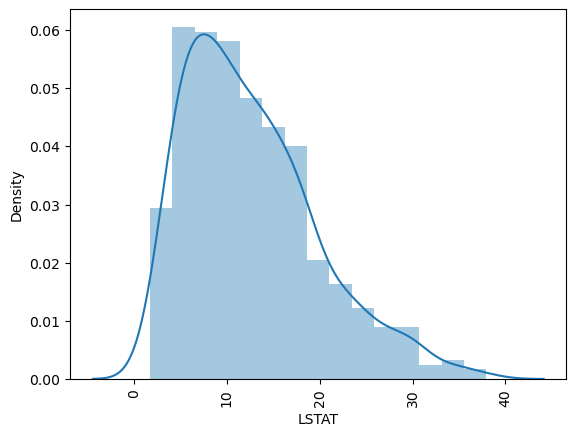

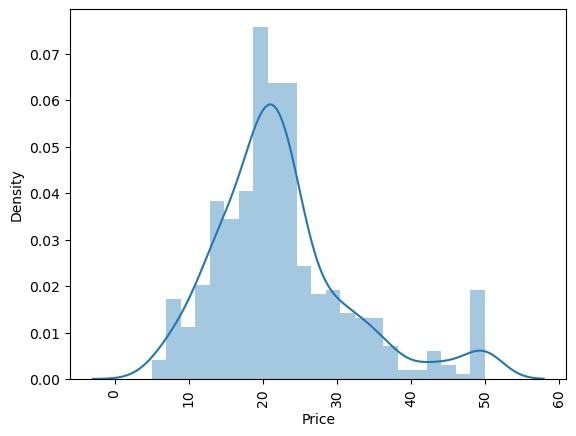

In [52]:
#Lets plot Dist plot
for i in newdf:
    plt.figure()
    sns.distplot(newdf[i])
    plt.xticks(rotation=90)
    plt.show()

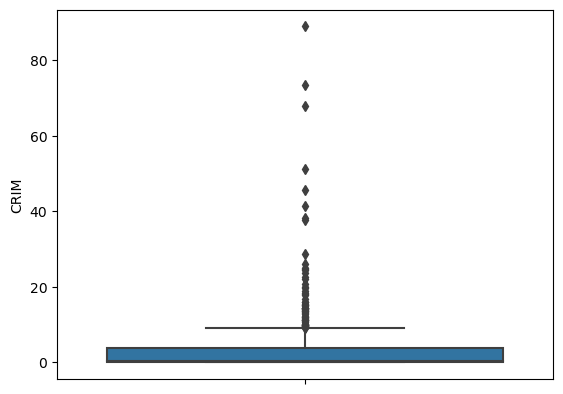

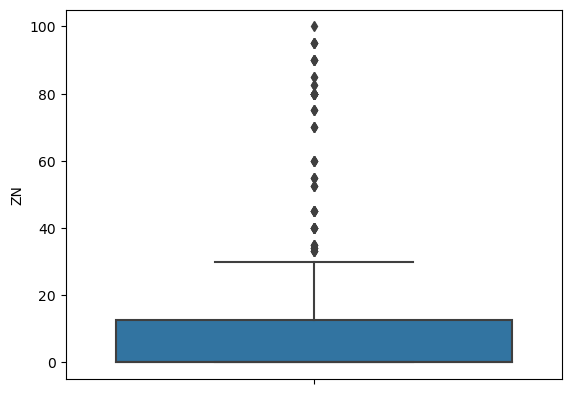

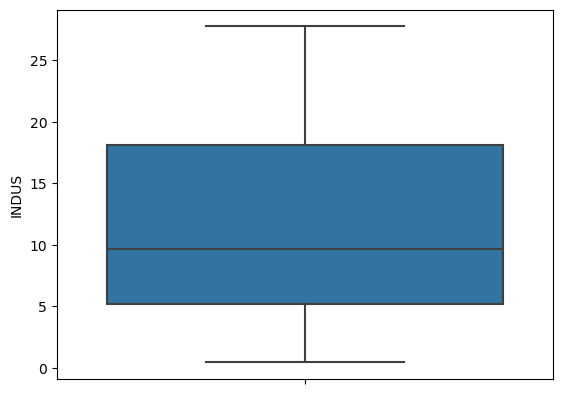

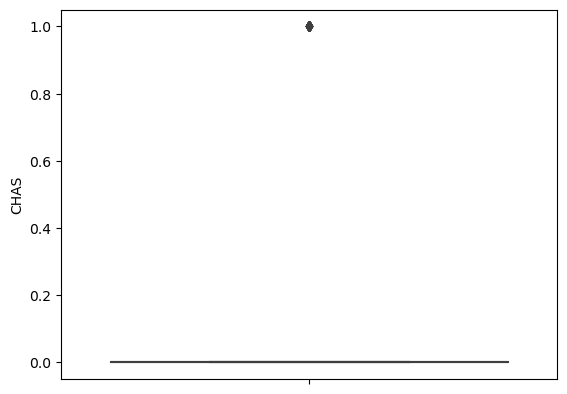

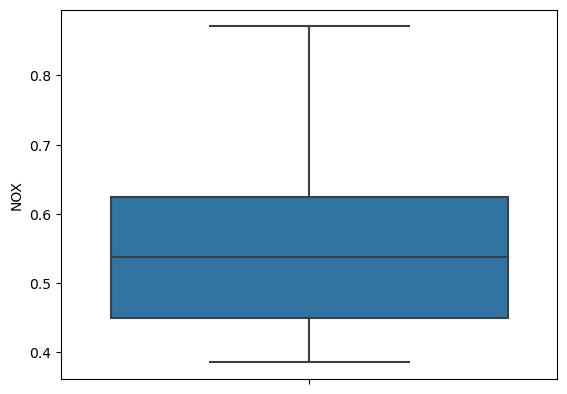

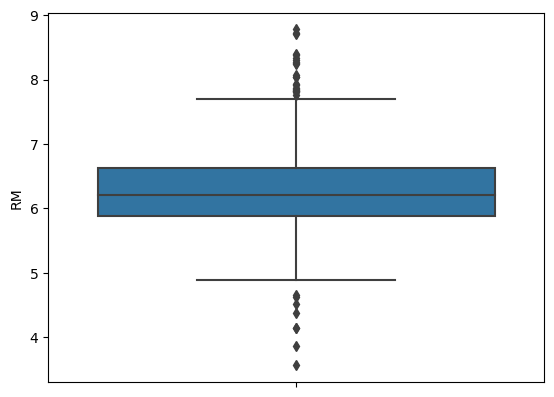

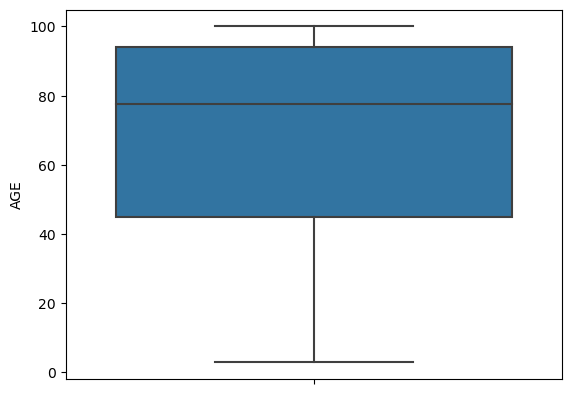

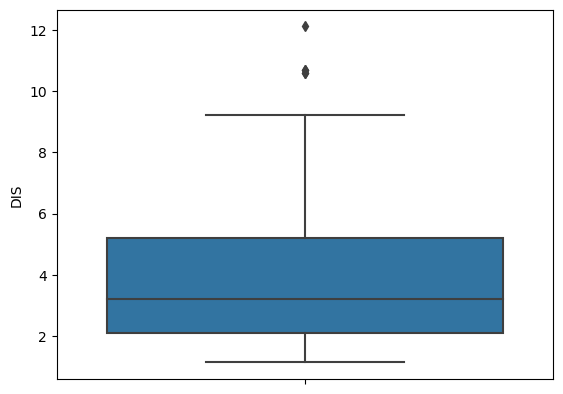

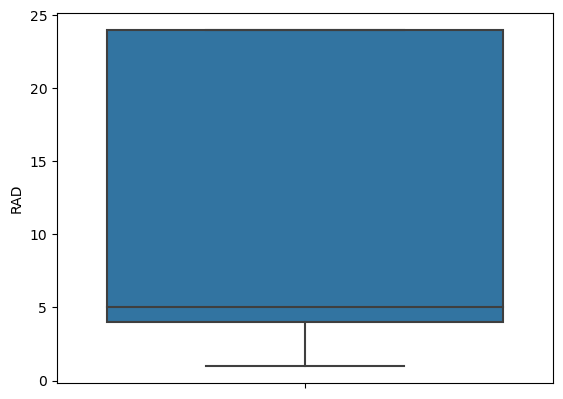

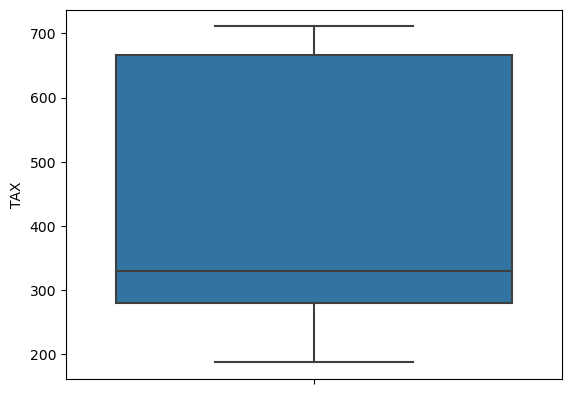

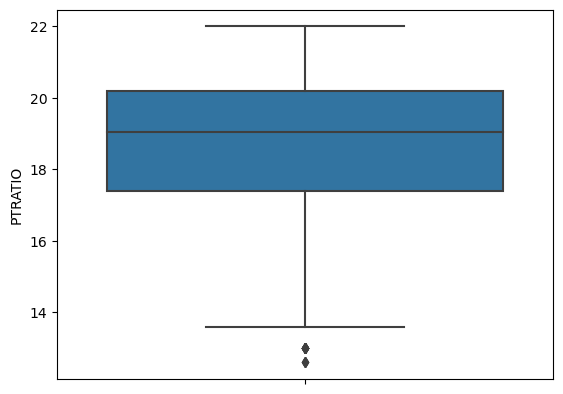

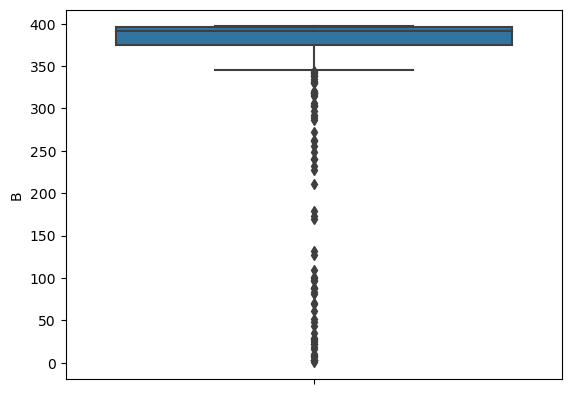

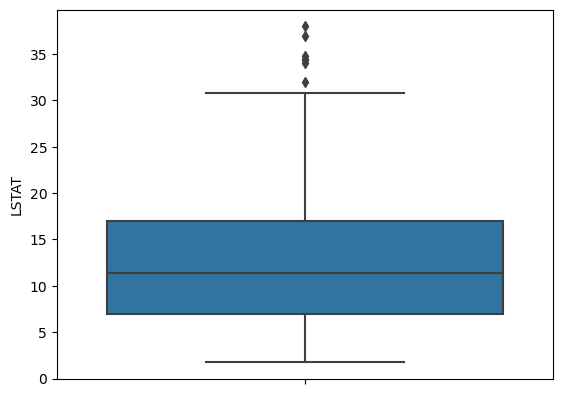

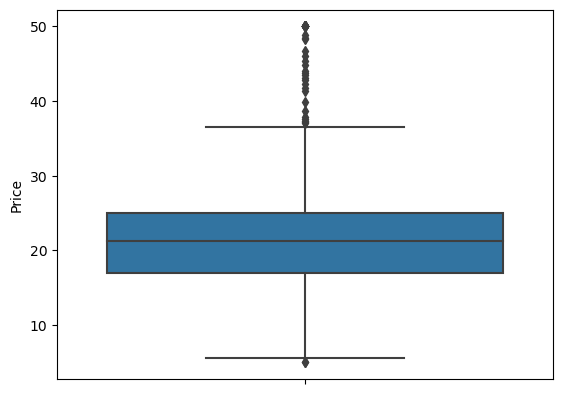

In [53]:
#Lets plot Box Plot For Outliers
#Lets plot Dist plot
for i in newdf:
    plt.figure()
    sns.boxplot(y=newdf[i])
    plt.xticks(rotation=90)
    plt.show()

# Preprocessing Steps

In [60]:
import numpy as np
from scipy.stats import zscore

In [61]:
#Lets remove Outliers
features = df[['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT']]

In [62]:
# Using zscore to remove outliers

z=np.abs(zscore(features))

z

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,0.419782,0.284830,0.413672,0.140214,1.459000,0.441052,1.075562
1,0.417339,0.487722,0.194274,0.557160,0.303094,0.441052,0.492439
2,0.417342,0.487722,1.282714,0.557160,0.303094,0.396427,1.208727
3,0.416750,0.487722,1.016303,1.077737,0.113032,0.416163,1.361517
4,0.412482,0.487722,1.228577,1.077737,0.113032,0.441052,1.026501
...,...,...,...,...,...,...,...
501,0.413229,0.487722,0.439316,0.625796,1.176466,0.387217,0.418147
502,0.415249,0.487722,0.234548,0.716639,1.176466,0.441052,0.500850
503,0.413447,0.487722,0.984960,0.773684,1.176466,0.441052,0.983048
504,0.407764,0.487722,0.725672,0.668437,1.176466,0.403225,0.865302


In [64]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [65]:
# Shape of original dataset
df.shape

(506, 14)

In [66]:
#After Removing Outliers
new_df.shape

(448, 14)

In [67]:
# Checking the the data loss
data_loss = (506-448)/507*100
data_loss

11.439842209072978

Here we loss 11.41 % Data. 

# Correlation between the target variable and features using HEAT map

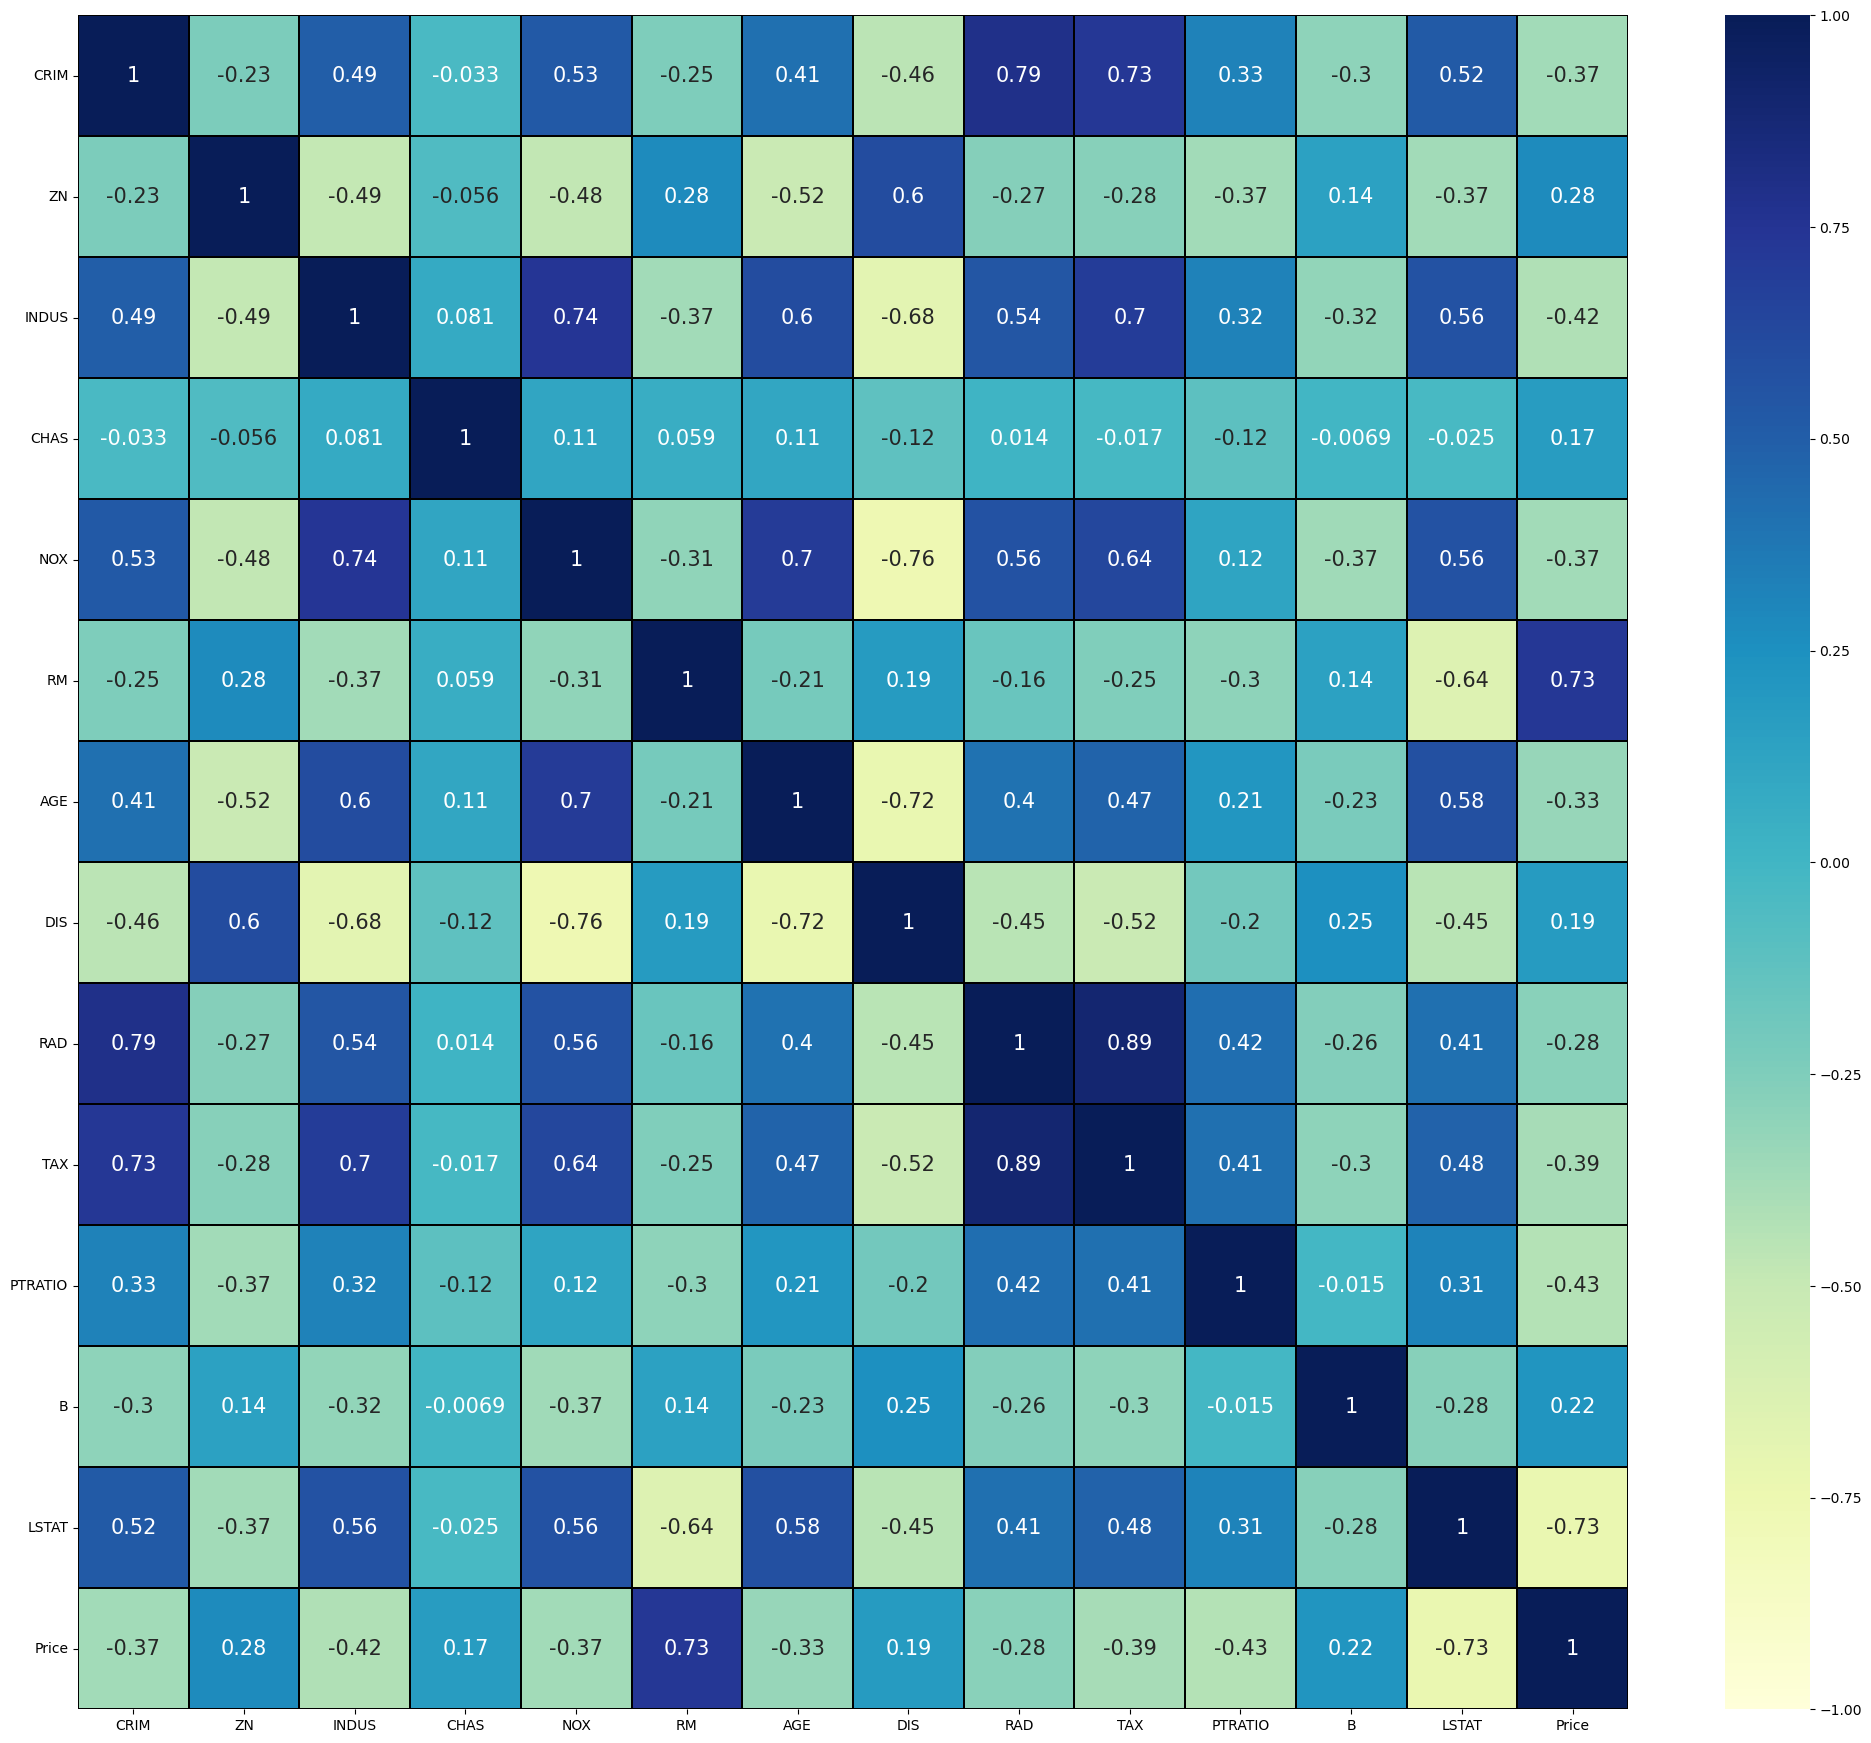

In [68]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

# Visualizing the correlation between label(primary_fuel) and features using bar plot

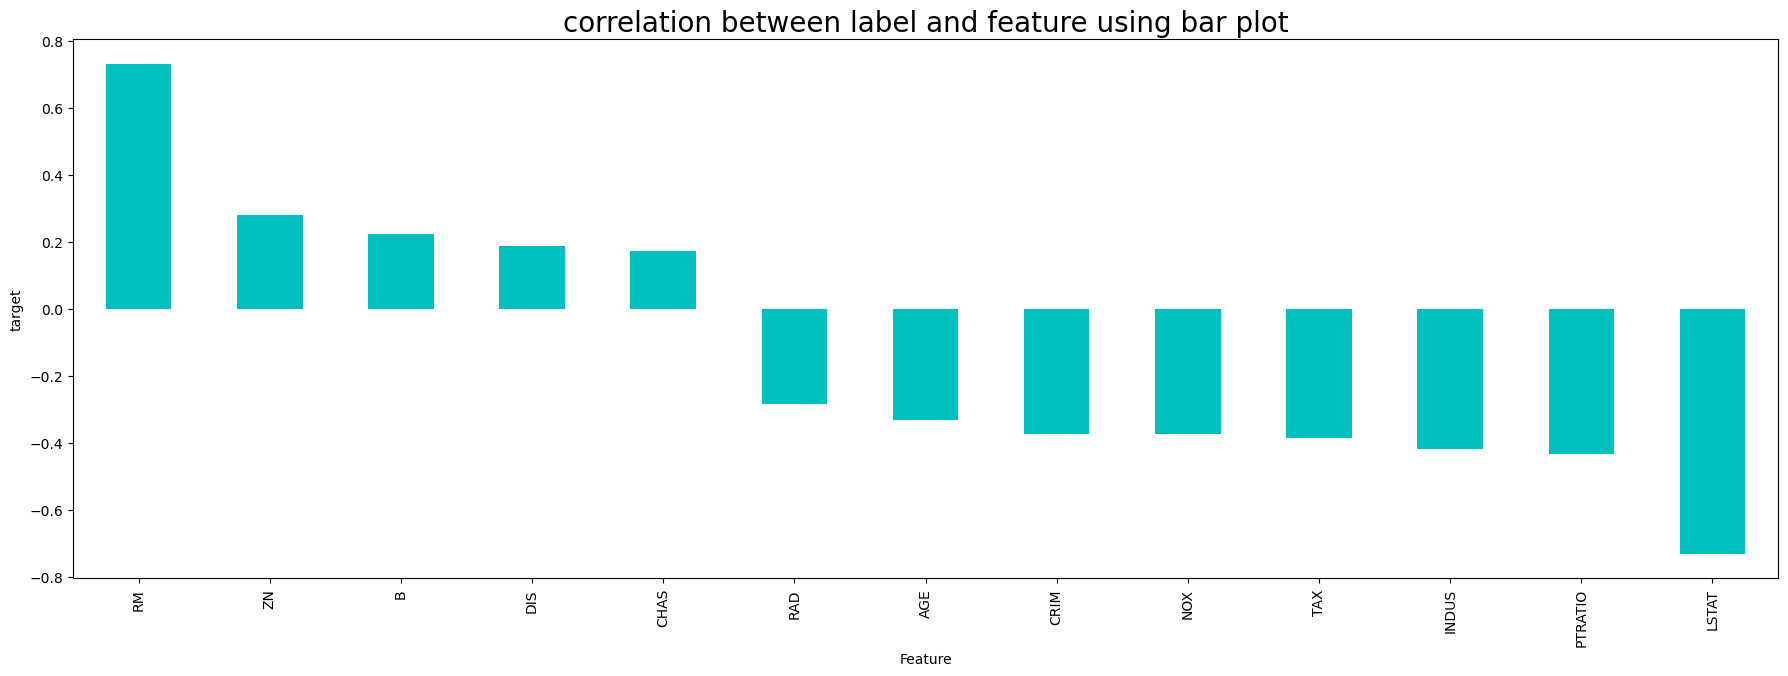

In [70]:
plt.figure(figsize=(22,7))
new_df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

# Model Building


In [11]:
x=df.drop(columns=['Price'])
y=df['Price']

# Checking for skewness

In [71]:
x.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64

Here i am setting the threshold for +-0.5. and we can see that very less data comes into a range. So lets go and fix it

# Removing skewness using yeo_johnson method

In [72]:
skew = ["CRIM","ZN",'CHAS','NOX','DIS','RAD','B','LSTAT']

In [73]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [74]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,CRIM,ZN,CHAS,NOX,DIS,RAD,B,LSTAT
0,-1.056151,1.605270,-0.272599,0.027165,0.443907,-2.314674,0.632757,-1.257099
1,-0.999901,-0.599954,-0.272599,-0.716093,0.796950,-1.448933,0.632757,-0.334422
2,-0.999953,-0.599954,-0.272599,-0.716093,0.796950,-1.448933,0.502065,-1.543453
3,-0.986675,-0.599954,-0.272599,-0.851247,1.144611,-0.909551,0.559404,-1.934975
4,-0.894461,-0.599954,-0.272599,-0.851247,1.144611,-0.909551,0.632757,-1.161275


In [75]:
# Checking skewness after using yeo-johnson ethod
x.skew()

CRIM       0.595482
ZN         1.071695
INDUS      0.295022
CHAS       3.405904
NOX        0.098431
RM         0.403612
AGE       -0.598963
DIS        0.067176
RAD        0.065818
TAX        0.669956
PTRATIO   -0.802325
B         -1.908672
LSTAT     -0.017928
dtype: float64

ALmost all data comes in our range

In [76]:
#Lets go for model building.

In [22]:
# finding Best Random state for Decision Tree Regression
maxAccu=0
maxRS=0

for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9358135329584147 on Random State 97


In [23]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=97)

In [24]:
regressors = {
    
    'Random Forest' : RandomForestRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]
results

,MAE,MSE,RMSE,R2-score
Random Forest,1.897,5.661,2.379361,0.939


# Cross - Validation of the mode

In [27]:
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [28]:
# from sklearn.model_selection import cross_val_score
for j in range(2,10):
    isscore = cross_val_score(rf,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 2
Cross validation score is:- 73.81731096028713
accuracy_score is:- 93.99273698387664


At cv:- 3
Cross validation score is:- 54.227959846194665
accuracy_score is:- 93.99273698387664


At cv:- 4
Cross validation score is:- 55.83839530134137
accuracy_score is:- 93.99273698387664


At cv:- 5
Cross validation score is:- 61.78438769114831
accuracy_score is:- 93.99273698387664


At cv:- 6
Cross validation score is:- 65.21788674303716
accuracy_score is:- 93.99273698387664


At cv:- 7
Cross validation score is:- 65.52462229823622
accuracy_score is:- 93.99273698387664


At cv:- 8
Cross validation score is:- 53.537965026695154
accuracy_score is:- 93.99273698387664


At cv:- 9
Cross validation score is:- 58.922488226294
accuracy_score is:- 93.99273698387664




# Lets do Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
#We are tuning four important hyperparameter right now, we are passing the different values for both paramters.

from sklearn.model_selection import GridSearchCV
grid_param={
    
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes

#criterian

In [37]:
grid_search=GridSearchCV(estimator=rf,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)#use all the cores in your system for performance improvement .

In [38]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [39]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'max_depth': 14, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 7}


In [40]:
#Initiate DecisionTreeClassifier with new parameter and train.

cnn=RandomForestRegressor(max_depth=14,max_leaf_nodes=9,min_samples_split= 2,min_samples_leaf=2)

In [41]:
#Train the model
cnn.fit(X_train,y_train)

RandomForestRegressor(max_depth=14, max_leaf_nodes=9, min_samples_leaf=2)

In [42]:
cnn.score(X_test,y_test)

0.9167464678795597

In [43]:
pred = model.predict(X_test)

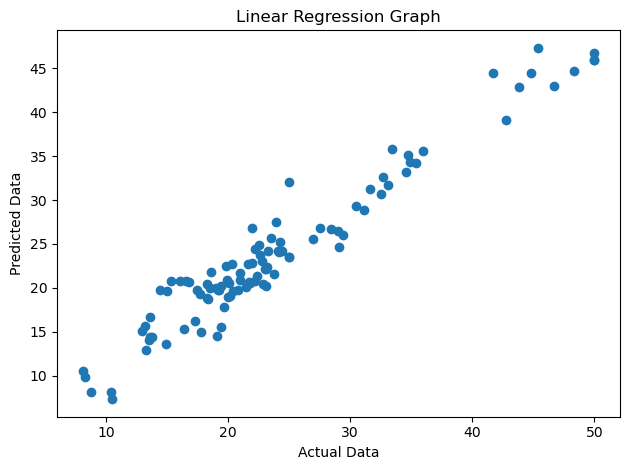

In [44]:
#Lets plot Best Fit Line
plt.scatter(y_test,pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Linear Regression Graph')
plt.tight_layout()

In [45]:
#Intern at DataTrained
#Student of DataTrained - Saurav
#Date - 7 April 2023
#Time - 14:40